# Neural Computation (Autumn 2020)
# Lab 2: Advanced Python Libraries & Linear Regression

In this exercise, you will learn the following:

* Advanced libraries like Numpy and Matplotlib
* Import a data file with NumPy
* Produce scatter and line plots using Matplotlib
* Define a linear model and a cost function
* Fit a linear model using Ordinary Least Squares Method
* Train a linear model using Gradient Descent Algorithm

# Section 1: Numpy & Matplotlib
## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package. 

In [1]:
import numpy as np

To call a function `X` from the NumPy module, you would normally have to write `NumPy.X()`. However, if you invoke NumPy functions many places in your code, this quickly becomes tedious. By adding `as np` after your `import` statement as shown above, you can instead write  `np.X()`, which is less verbose. 

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [4]:
print(b.shape)                   
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [5]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [6]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [7]:
c = np.full((2,2), 7) # Create a constant array
print(c) 

[[7 7]
 [7 7]]


In [8]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [9]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.38855037 0.94208722]
 [0.57070623 0.04053697]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [10]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [11]:
print(a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [12]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [13]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [14]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [15]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [16]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [17]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [18]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [19]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [20]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [21]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [22]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [23]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [24]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [25]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [26]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [27]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [28]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [29]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [54]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [55]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [56]:
v = np.array([[1,2,3]])
print(v) 
print(v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [30]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [31]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

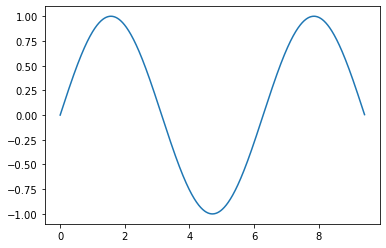

In [35]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.01)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

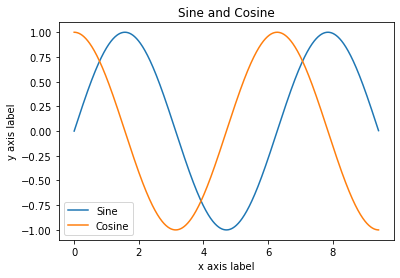

In [36]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. You have to add `plt.show`Here is an example.

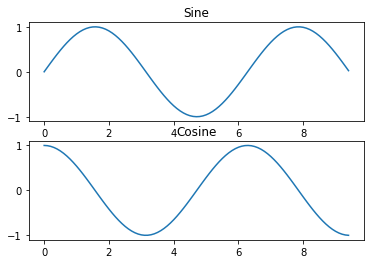

In [51]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

# Section 2: Linear Regression


## Reading data from a CSV file

We first read the cat data set from a local comma separated value (CSV) file, and store the body and heart weights in two arrays. 

We will use the [genfromtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.genfromtxt.html) function in NumPy to read the data set from a CSV file located at some URL.

    np.genfromtxt(url, delimiter=None, skip_header=0, usecols=None) 

This function takes several arguments, including: 

* `url`: a string that specifies a file name or an URL for the CSV file, 
* `delimiter`: a string used to separate value, 
* `skip_header`: an int indicates the number of lines to skip at the beginning of the file,  
* `usecols`: a sequence indicating which columns to read, with 0 as first column. 
            
We can read data from the file and store them into a variable named `cats` using the following line. You can see that `cats` is a NumPy array with two columns. The first column is the body weight, while the second column is the heart weight.

In [52]:
# Read the data from file
url = "http://www.cs.bham.ac.uk/~lehrepk/nc/cats.csv"
cats = np.genfromtxt(url, delimiter=",", skip_header=1, usecols=(1,2))

# print out the content of cats
cats

array([[ 2. ,  7. ],
       [ 2. ,  7.4],
       [ 2. ,  9.5],
       [ 2.1,  7.2],
       [ 2.1,  7.3],
       [ 2.1,  7.6],
       [ 2.1,  8.1],
       [ 2.1,  8.2],
       [ 2.1,  8.3],
       [ 2.1,  8.5],
       [ 2.1,  8.7],
       [ 2.1,  9.8],
       [ 2.2,  7.1],
       [ 2.2,  8.7],
       [ 2.2,  9.1],
       [ 2.2,  9.7],
       [ 2.2, 10.9],
       [ 2.2, 11. ],
       [ 2.3,  7.3],
       [ 2.3,  7.9],
       [ 2.3,  8.4],
       [ 2.3,  9. ],
       [ 2.3,  9. ],
       [ 2.3,  9.5],
       [ 2.3,  9.6],
       [ 2.3,  9.7],
       [ 2.3, 10.1],
       [ 2.3, 10.1],
       [ 2.3, 10.6],
       [ 2.3, 11.2],
       [ 2.4,  6.3],
       [ 2.4,  8.7],
       [ 2.4,  8.8],
       [ 2.4, 10.2],
       [ 2.5,  9. ],
       [ 2.5, 10.9],
       [ 2.6,  8.7],
       [ 2.6, 10.1],
       [ 2.6, 10.1],
       [ 2.7,  8.5],
       [ 2.7, 10.2],
       [ 2.7, 10.8],
       [ 2.9,  9.9],
       [ 2.9, 10.1],
       [ 2.9, 10.1],
       [ 3. , 10.6],
       [ 3. , 13. ],
       [ 2. ,

Now we are going to use a variable named `body_weight` to store all body weight (the first column in the `cats` array). To do so, we call a function `T` (transpose) to convert two columns into two rows. Each row now can be accessed by specifying the row number inside a square bracket. The following line will extract all data from the first column of the cats array and store them into the variable body_weight. 

In [53]:
# extract body_weight data from cats variable
body_weight = cats.T[0]
body_weight

array([2. , 2. , 2. , 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.1, 2.2,
       2.2, 2.2, 2.2, 2.2, 2.2, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3,
       2.3, 2.3, 2.3, 2.3, 2.4, 2.4, 2.4, 2.4, 2.5, 2.5, 2.6, 2.6, 2.6,
       2.7, 2.7, 2.7, 2.9, 2.9, 2.9, 3. , 3. , 2. , 2. , 2.1, 2.2, 2.2,
       2.2, 2.2, 2.2, 2.2, 2.2, 2.2, 2.3, 2.4, 2.4, 2.4, 2.4, 2.4, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6,
       2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8,
       2.8, 2.8, 2.8, 2.9, 2.9, 2.9, 2.9, 2.9, 3. , 3. , 3. , 3. , 3. ,
       3. , 3. , 3. , 3. , 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2,
       3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.6, 3.7, 3.8, 3.8, 3.9,
       3.9])

You should now complete the next code block in order to copy the second column in an array `heart_weight`.

In [58]:
# write your code to extract data from second column here
heart_weigth = cats.T[1]

## Visualising the data
We will now visualise the relationship between body and heart weights of the cats using a scatter plot using the [`scatter`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) function in the matplotlib.pylot module. This function can be called as follows:

    plt.scatter( x , y )
    
The two arguments `x` and `y` are the input data. We can label the `x`- and `y`-axes as follows: 

    plt.xlabel("x_label_here") 
    plt.ylabel("y_label_here") 
    
The function scatter has many additional arguments, as [described in the reference manual]([`scatter`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html). 

Now, you should make a scatter plot of the heart weight versus body weight. You should label the x- and y-axes by "Body weight (kg)" and "Heart weight (gm)". Hint: Remember to include `plt.show()` at the end; otherwise, the scatter plot is not shown.

In [ ]:
# Insert your code to make the scatter plot here.


## Defining a Linear Model

A linear regression model in one variable has the following form $f(x) = wx+b$, where $x$ is the input, $w$ is called the weight and $b$ is known as the bias. As discussed in the lecture, we simplify the model even more by assuming $b=0$. The model now becomes $f(x)=wx$. If you sketch this model on xy coordinate system, it is a straight line passing through the origin with slope $w$. (i.e. derivative). 

The purpose of generating such a model is to predict an output (cat heart weight) given an input (cat body weight). Given the model parameter $w$ and the new input $x$, the output predicted by our simple model is $wx$. We will define a function named `linearmodel(x,w)` which represents this model. The function takes two arguments, the model parameter $w$ and the input $x$, and it returns the predicted output $wx$. Please refer to last week's lab sheet for a brief introduction to function definition in Python.

Now, you should define the function `linearmodel` as described above.

In [ ]:
# Insert code to define the linearmodel function here.


We will visualise the cat data set together with the linear regression model for a given weight parameter $w$. Let's consider the following block of codes.

    w = 3.907111
    x = np.arange(2.0, 4.0, 0.2)
    plt.plot(x, linearmodel(x,w), 'r-')
    plt.show()
    
The first line assigns a value of 3.907111 to the weight $w$. The function call `np.arange(x,y,z)` returns an array of evenly separated values, starting from x to y (excluding) with step size of z. For example, np.arange(3,7,2) yields an array consisting of 3 and 5 only. The `plt.plot()` function call is then invoked to plot the linear model for a given weight. Notice that the data set drawn on the y-axis in this case will be the set of output values received from calling the function `linearmodel(x,w)` once for each element in the array `x`. The argument `'r-'` specifies that we want to plot a solid red line.

Write code to plot this simple linear model for the cats data set. You have to plot the cats data set first (use code from the previous exercise, and remove the `plt.show()` in the end), and then add the code to plot the linear model. Remember to add `plt.show()` in the end, otherwise the plot is not displayed.

In [ ]:
# Add your previous code to plot a scatter here without plt.show() at the end.


# Plot the linear regression model f(x) = x*w here as solid red line (r-) in the interval [2,4).


## Ordinary Least Square Solution
As you can see from the lecture notes, we define a cost function as follows.

$$J(w) = \frac{1}{n}{\sum_{i=1}^n}\frac{1}{2}(y^{(i)}-wx^{(i)})^2$$

By solving the equation $J'(w)=0$ for $w$, We obtain the ordinary least square solution

$$w = \frac{\sum_{i=1}^n x^{(i)}y^{(i)}}{\sum_{i=1}^n (x^{(i)})^2}$$

Here in order to calculate the numerator, we have to calculate $n$ products $x^{(i)}y^{(i)}$ (for $i=1,2,...,n$), and then sum them up. We have to do the same number of steps for the denominator. 

Perhaps the most immediate way of computing these expressions in Python would be to use two for-loops. However, by realising that the numerator and denumerator are dot products between two vectors, we can take advantage of NumPy's efficient routines.
The dot product between two vectors $x = (x^{(1)}, x^{(2)},\ldots,x^{(n)})$ and $y=(y^{(1)}, y^{(2)},\ldots,y^{(n)})$ is $x\cdot y = \sum_{i=1}^n x^{(i)}y^{(i)}$. The formula to calculate $w$ above can be now rewritten as 

$$w = \frac{x\cdot y}{x\cdot x}.$$

To compute the dot product between two vectors $x$ and $y$, we can invoke the NumPy function `np.dot(x,y)`. 

Implement a function `ols` which takes two arguments $x$ and $y$, and which returns the value of the weight parameter $w$ according to the formula above.

In [ ]:
# define your ols function here


Now call the function `ols` with the arrays `body_weight` and `heart_weight` as arguments. What is the value of weight $w$ you obtain?

In [ ]:
# call the ols function here


## Defining a Cost Function

The following two functions computes the cost function $J(w)$ and its derivative $J'(w)$ (or $\nabla J(w)$), defined above using the data set. Here we make use of function `np.sum()` to perform the summation of two vectors. 

Note that in the notation of the cost function $J(w)$, we omit the input `X` (i.e., body_weight) and 
target `Y` (i.e., heart_weight), but we have to include them when defining the cost function in Python. 

In [ ]:
# cost function
def J(w, X, Y):
    return 0.5*(np.sum((Y - linearmodel(X, w)))**2)

# derivative of the cost function
def J_d(w, X, Y):
    return np.dot(X.T, (linearmodel(X, w)-Y))

We assign some values to $w$, using a `np.arange(start, stop, step)` function call as follows:

    w = np.arange(2.9,5.0,0.01)
    
The corresponding values of $J(w)$ can be computed using list comprehension as follows. 

    [J(i) for i in w] 
    
In this statement, we call function $J(i)$ for each value $i$ in the list $w$. 
The result of this statement will be a list $[J(w_1), J(w_2),\ldots,J(w_n)]$. If you do not know what list comprehension is, please refer to last week's lab sheet.
   
Can you plot the loss function for values of weight $w$ given above? Remember to label the x- and y-axis as "w" and "J(w)", respectively, and include plt.show() at the end. 

In [ ]:
# plot the loss function here


By looking at the plot you have just drawn, can you roughly estimate for which value of $w$ the loss function has minimum value?

## Gradient Descent Algorithm in One-Dimensional Space

In this final section, we are going to use the gradient descend method to find  $w^{*} = \text{arg min}_w J(w)$, that is, the value of parameter $w$ such that $J(w)$ reaches the (locally) minimum value. In gradient descent, we usually work with an *iterative update scheme* for the weight $w$: 
$$w^{(t+1)} \leftarrow w^{(t)} + \Delta w,$$ 
where $\Delta w = -\epsilon \cdot \nabla J(w^{(t)})$ for some (often constant) learning rate $\epsilon$ and the gradient $\nabla J$ evaluated at current parameter value $w^{(t)}$. Intuitively speaking, we update the parameters in each iteration in the *opposite* direction of the gradient. The update rule can be formally written as follows.

$$w^{(t+1)} \leftarrow w^{(t)} - \epsilon\cdot  \nabla J(w^{(t)}).$$

The following (partial) code first sets up a canvas to illustrate visually how gradient descent works on the loss function $J(w)$. Here we use a learning rate $\epsilon = 0.0001$ and initial weight $w_0 = 2.5$. A for-loop will iteratively update the value of weight $w$ (see the body of the for-loop). After each update, the new value of weight $w$ will be plotted, and over time, it shows clearly how the weight is updated until coverging to the global optimum. 

Complete the code below so that the parameter $w$ is updated via gradient descent.

In [ ]:
%matplotlib notebook

import time

# set up the canvas
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

# limit range of values on x-axis
x = np.arange(2,6, 0.1)

# Learning rate
epsilon = 0.0001

# Initial weight
w = 2.5

# update values of w
for i in range(1,100):   
    w = 0 # CHANGE THIS LINE OF THE CODE
    ax.clear()
    ax.plot(x,[J(y, body_weight, heart_weight) for y in x])
    ax.plot(w, J(w, body_weight, heart_weight),'o')
    fig.canvas.draw()
    time.sleep(1)

For what value of the weight parameter $w$ does the loss function reach its minimum value? 

How is this value different from the weight obtained by using the least-square method? 